# Project: Wrangling and Analyze Data
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#data_gather">Data Gathering</a></li>  
<li><a href="#assessing">Assessing Data</a></li>
<li><a href="#clean">Cleaning Data</a></li>
<li><a href="#av">Analyzing and Visualizing Data</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this project "Wrangling and Analyzing Data" we made use of the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because ["they're good dogs Brent."](http://knowyourmeme.com/memes/theyre-good-dogs-brent) WeRateDogs has over 4 million followers and has received international media coverage. We would be making use of WeRateDogs [Twitter archive data](https://support.twitter.com/articles/20170160) which was downloaded by WeRateDogs and sent to [Udacity.](https://Udacity.com)
>
>● We would be making use of WeRateDogs [Twitter archive data](https://support.twitter.com/articles/20170160) which was downloaded by WeRateDogs and sent to [Udacity.](https://Udacity.com)
>
>● The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which [Udacity](https://Udacity.com) used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, [Udacity](https://Udacity.com) have filtered for tweets with ratings only (there are 2356).
>
>● The Twitter archive is great, but it only contains very basic tweet information. We would be making use of additional two datasets to create interesting and trustworthy analyses and visualizations.
>
>● The first is gotten via the Twitter API, which contains additional data not includedd in the archived file which contains retweet count and favorite count. 
>
>● The second which is a image predictions file. Every image in the WeRateDogs Twitter archive was ran through a neural network that can classify breeds of dogs*. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).




In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline
import re
from bs4 import BeautifulSoup

<a id='data_gather'></a>
## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [93]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [94]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
predictions = pd.read_csv(url, sep='\t')

In [3]:
predictions = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet-json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)


In [4]:
tweets = []
for line in open('tweet-json', 'r'):
     tweets.append(json.loads(line))

TwitterData = pd.DataFrame(tweets)
        
    

In [5]:
TwitterData = TwitterData.loc[:,['id','retweet_count','favorite_count']]

<a id='assessing'></a>
## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [6]:
twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [7]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [8]:
predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [9]:
predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [10]:
predictions[predictions['p1_dog']==True]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [11]:
TwitterData.head(3)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


In [12]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
#The first prediction has the highest confidence
print(predictions.p1_conf.max())
print(predictions.p2_conf.max())
print(predictions.p3_conf.max())

1.0
0.488014
0.273419


In [15]:
TwitterData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality issues

1. Dropping columns that will not be used in `twitter archieve` **table**

2. Erroneous datatypes (timestamp columns) in `twitter_achieve` **table** 

3. tweet_id should be "string" not "int" in `twitter_archive` **table**

4.  Getting the values of source and replacing them in the column in `twitter_archive` **table**

5. Dropping columns that relates to 2nd and 3rd predictions in `predictions` **table**

6. Selecting columns that predicted only dogs in `predictions` **table**

7. Renaming the id column to tweet_id in `TwitterData` **table**

8. Erroneous datatype of tweet_id column in `TwitterData` **table**

9. Erroneous datatype of tweet_id in `predictions` **table**

10. Unrepresented column names (p1, p1_conf) `predictions` **table**

`Prediction` table dropping columns not needed

### Tidiness issues
1. Four variables in four columns in `twitter_archive` table instead of a column (Doggo, floofer, pupper, puppo)

2. `TwitterData` table should be part of `twitter_achieve` table

3. `predictions` table should be part of `Twitter master`

<a id='clean'></a>
## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [16]:
# Make copies of original pieces of data
ArchivedTwitter = twitter_archive.copy()
prediction = predictions.copy()
TwitterDataAdd = TwitterData.copy()

### Issue #1: Dropping columns that will not be used in twitter archieve data

#### Define: Slicing columns to be used using `.loc`

#### Code

In [17]:
ArchivedTwitter = ArchivedTwitter.loc[:,['tweet_id','timestamp','source','text','rating_numerator','rating_denominator','name','doggo','floofer','pupper','puppo']]

#### Test

In [18]:
ArchivedTwitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   rating_numerator    2356 non-null   int64 
 5   rating_denominator  2356 non-null   int64 
 6   name                2356 non-null   object
 7   doggo               2356 non-null   object
 8   floofer             2356 non-null   object
 9   pupper              2356 non-null   object
 10  puppo               2356 non-null   object
dtypes: int64(3), object(8)
memory usage: 202.6+ KB


### Issue #2 & 3: Erroneous datatypes (timestamp, tweet_id columns) in twitter_achieve table

#### Define: Making use of `astype` to change tweet_id column to string and using `to_datetime` to change timestamp column

#### Code

In [19]:
#Converting tweet_id to string
ArchivedTwitter.tweet_id = ArchivedTwitter.tweet_id.astype('str')

#Converting timestamp column to datetime format after stripping
ArchivedTwitter.timestamp = ArchivedTwitter.timestamp.str.strip('+0000')
ArchivedTwitter.timestamp = pd.to_datetime(ArchivedTwitter.timestamp)

#### Test

In [20]:
ArchivedTwitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2356 non-null   object        
 1   timestamp           2356 non-null   datetime64[ns]
 2   source              2356 non-null   object        
 3   text                2356 non-null   object        
 4   rating_numerator    2356 non-null   int64         
 5   rating_denominator  2356 non-null   int64         
 6   name                2356 non-null   object        
 7   doggo               2356 non-null   object        
 8   floofer             2356 non-null   object        
 9   pupper              2356 non-null   object        
 10  puppo               2356 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 202.6+ KB


### Issue #4: Getting the values of source and replacing them in the column

#### Define: Using `extract` method to extract texts within the tags

#### Code

In [21]:
ArchivedTwitter['source'] = ArchivedTwitter['source'].str.extract(r"^<a.+>(.+)</a>$")

In [68]:
ArchivedTwitter['source'].value_counts()

Twitter for iPhone     8884
Vine - Make a Scene     364
Twitter Web Client      132
TweetDeck                44
Name: source, dtype: int64

#### Test

In [23]:
ArchivedTwitter.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None


### Tidy Issue #1: Four variables in four columns in twitter_archive table instead of a column (Doggo, floofer, pupper, puppo)

#### Define: Using `melt` to reduce columns[doggo,floofer,pupper,puppo] into one column

#### Code

In [24]:
#melting the columns that make up stages and storing in a new dataframe
ArchivedTwitter = pd.melt(ArchivedTwitter, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator', 'rating_denominator', 'name'],
                           var_name='stage', value_name='case')

In [25]:
#Dropping the case column
ArchivedTwitter.drop(columns='case', inplace=True)

#### Test

In [26]:
ArchivedTwitter.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,doggo
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,doggo


### Issue #5: Dropping columns that relates to 2nd and 3rd predictions

#### Define: uing the `drop` method to drop columns

#### Code

In [27]:
#Dropping the columns that relates to 2nd and 3rd predictions
predictions.drop(columns=['p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], inplace=True)

#### Test

In [28]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 83.2+ KB


### Issue #6:Selecting columns that predicted only dogs

#### Define: using conditional operator to select rows

#### Code

In [29]:
#selecting rows that predicted dogs
predictions = predictions[predictions['p1_dog']==True]

#### Test

In [30]:
predictions['p1_dog'].value_counts()

True    1532
Name: p1_dog, dtype: int64

### Issue #7: Renaming the id column to tweet_id in TwitterData table

#### Define: Using `rename` method to rename column name

#### Code

In [31]:
#Renaming the selected column name to 'tweet_id'
TwitterDataAdd.rename(columns=  {'id':'tweet_id'}, inplace=True)

#### Test

In [32]:
TwitterDataAdd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Issue #8: Erroneous datatype of tweet_id column in `TwitterData` table

#### Define: Using `astype` method to change the datatype of tweet_id

#### Code

In [33]:
TwitterDataAdd.tweet_id = TwitterDataAdd.tweet_id.astype('str')

#### Test

In [34]:
TwitterDataAdd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


### Tidy Issue #2:

#### Define: merging the ArchivedTwitter table with TwiiterData table

#### Code

In [35]:
twitter_data = pd.merge(ArchivedTwitter, TwitterDataAdd, on='tweet_id', how = 'left')

#### Test

In [36]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9424 entries, 0 to 9423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            9424 non-null   object        
 1   timestamp           9424 non-null   datetime64[ns]
 2   source              9424 non-null   object        
 3   text                9424 non-null   object        
 4   rating_numerator    9424 non-null   int64         
 5   rating_denominator  9424 non-null   int64         
 6   name                9424 non-null   object        
 7   stage               9424 non-null   object        
 8   retweet_count       9416 non-null   float64       
 9   favorite_count      9416 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 809.9+ KB


### Issue #9: Erroneous datatype of tweet_id in predictions table

#### Define: changing the datatype of tweet_id column in predictions table using `astype` method

#### Code

In [37]:
#changing the datatpe of tweet_id to string or object
predictions.tweet_id = predictions.tweet_id.astype('str')

C:\Users\pc\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


#### Test

In [38]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1532 non-null   object 
 1   jpg_url   1532 non-null   object 
 2   img_num   1532 non-null   int64  
 3   p1        1532 non-null   object 
 4   p1_conf   1532 non-null   float64
 5   p1_dog    1532 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 73.3+ KB


### Issue #10: Unrepresented column names (p1, p1_conf)

#### Define: Changing the column names 'p1_conf' and 'p1' to confidence_score and breed repectively using rename method

#### Code

In [39]:
#Changing the column names of p1 and p1_conf
predictions.rename(columns={'p1_conf':'confidence_score','p1':'breed'}, inplace=True)

C:\Users\pc\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


#### Test

In [40]:
predictions.head(3)

,tweet_id,jpg_url,img_num,breed,confidence_score,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True


In [41]:
#dropping columns that seem irrelevant
predictions.drop(columns=['img_num','p1_dog'], inplace=True)

C:\Users\pc\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [42]:
predictions.head(3)

,tweet_id,jpg_url,breed,confidence_score
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461


###  Tidy Issue #3: joining the twitter_data table with predictions table

#### Define: Using the `merge` method to oin the predictions table with twitter_data table

#### Code

In [43]:
twitter_master = twitter_data.merge(predictions, on='tweet_id')

In [44]:
twitter_master = twitter_master.dropna()

#### Test

In [45]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6124 entries, 0 to 6127
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            6124 non-null   object        
 1   timestamp           6124 non-null   datetime64[ns]
 2   source              6124 non-null   object        
 3   text                6124 non-null   object        
 4   rating_numerator    6124 non-null   int64         
 5   rating_denominator  6124 non-null   int64         
 6   name                6124 non-null   object        
 7   stage               6124 non-null   object        
 8   retweet_count       6124 non-null   float64       
 9   favorite_count      6124 non-null   float64       
 10  jpg_url             6124 non-null   object        
 11  breed               6124 non-null   object        
 12  confidence_score    6124 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), obje

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [46]:
twitter_master.to_csv("twitter_archive_master.csv", index=False)

<a id='av'></a>
## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [47]:
#importing pandas
import pandas as pd

#reading the csv file using pandas
df = pd.read_csv('twitter_archive_master.csv')

In [91]:
df.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,jpg_url,breed,confidence_score
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,doggo,6514.0,33819.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,floofer,6514.0,33819.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,pupper,6514.0,33819.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581


### Insights:
1. Most popular dog name

2. Most popular breed of dog

3. Average Confidence Score of Breeds

1. Most popular dog name

In [83]:
dff = df[(df['name']!='None') & (df['name']!='a')]

In [85]:
df1 = dff.sort_values(['retweet_count','favorite_count','name'],ascending=False)

In [87]:
df1.loc[:,['name','retweet_count','favorite_count']].head(15)

,name,retweet_count,favorite_count
1380,Stephan,56625.0,107015.0
1381,Stephan,56625.0,107015.0
1382,Stephan,56625.0,107015.0
1383,Stephan,56625.0,107015.0
680,Stephan,56625.0,0.0
681,Stephan,56625.0,0.0
682,Stephan,56625.0,0.0
683,Stephan,56625.0,0.0
208,Duddles,45849.0,107956.0
209,Duddles,45849.0,107956.0


2. Most popular breed of dog

In [57]:
df2 = df.sort_values(['retweet_count','favorite_count','breed'],ascending=False)

In [58]:
df2.loc[:,['breed','retweet_count','favorite_count']]

,breed,retweet_count,favorite_count
2684,Labrador_retriever,79515.0,131075.0
2685,Labrador_retriever,79515.0,131075.0
2686,Labrador_retriever,79515.0,131075.0
2687,Labrador_retriever,79515.0,131075.0
1380,Chihuahua,56625.0,107015.0
...,...,...,...
6015,curly-coated_retriever,23.0,107.0
6064,English_setter,16.0,81.0
6065,English_setter,16.0,81.0
6066,English_setter,16.0,81.0


3. Average Confidence Score of Breeds

In [64]:
breeds = df.groupby('breed')['confidence_score'].mean().index
Confidence_Average = df.groupby('breed')['confidence_score'].mean().values

In [65]:
Breeds_Confi = pd.DataFrame({'Breeds':breeds, 'Average':Confidence_Average})

In [66]:
#Breeds_Confi.sort_values(by='Average', ascending=False)
df5 = Breeds_Confi.sort_values(by='Average', ascending=False).head(5)
df5

,Breeds,Average
91,komondor,0.972531
80,clumber,0.946718
12,Brittany_spaniel,0.874545
89,keeshond,0.844431
77,bull_mastiff,0.815618


### Visualization

<AxesSubplot:title={'center':'Source of Images Bar Chart'}, xlabel='breed', ylabel='Counts'>

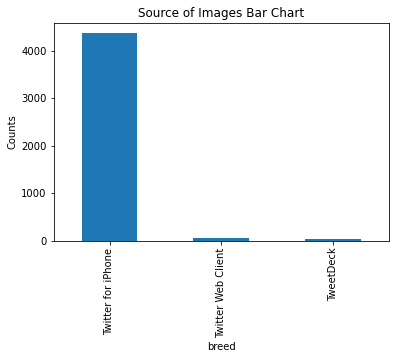

In [92]:
#plotting a bar chart of the sources of tweet
df1['source'].value_counts().plot(kind='bar', xlabel="breed", ylabel="Counts", title="Source of Images Bar Chart")